# <a href='https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388'> Medium article</a>

# Simple moving average

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
datafile = 'SPY.csv'
#This creates a dataframe from the CSV file:
data = pd.read_csv(datafile, index_col = 'Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-20,198.119995,199.160004,198.080002,198.919998,180.141846,72763000
2014-08-21,199.089996,199.759995,198.929993,199.500000,180.667160,67791000
2014-08-22,199.339996,199.690002,198.740005,199.190002,180.386368,76107000
2014-08-25,200.139999,200.589996,199.149994,200.199997,181.301010,63855000
2014-08-26,200.330002,200.820007,200.279999,200.330002,181.418716,47298000
...,...,...,...,...,...,...
2019-08-13,287.739990,294.149994,287.359985,292.549988,292.549988,94299800
2019-08-14,288.070007,288.739990,283.760010,283.899994,283.899994,135622100
2019-08-15,284.880005,285.640015,282.390015,284.649994,284.649994,99556600


In [4]:
#This selects the 'Adj Close' column
close = data['Adj Close']
#This converts the date strings in the index into pandas datetime format:
close.index = pd.to_datetime(close.index)
close

Date
2014-08-20    180.141846
2014-08-21    180.667160
2014-08-22    180.386368
2014-08-25    181.301010
2014-08-26    181.418716
                 ...    
2019-08-13    292.549988
2019-08-14    283.899994
2019-08-15    284.649994
2019-08-16    288.850006
2019-08-19    292.329987
Name: Adj Close, Length: 1258, dtype: float64

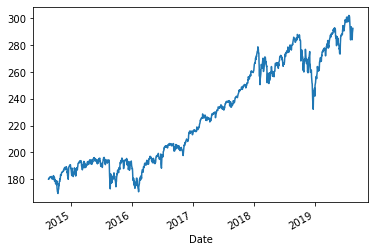

In [5]:
close.plot()
plt.show()

In [6]:
sma50 = close.rolling(window=50).mean()

In [8]:
sma50

Date
2014-08-20           NaN
2014-08-21           NaN
2014-08-22           NaN
2014-08-25           NaN
2014-08-26           NaN
                 ...    
2019-08-13    293.540820
2019-08-14    293.635375
2019-08-15    293.696567
2019-08-16    293.805137
2019-08-19    293.926582
Name: Adj Close, Length: 1258, dtype: float64

In [9]:
sma50.iloc[45:52]

Date
2014-10-23           NaN
2014-10-24           NaN
2014-10-27           NaN
2014-10-28           NaN
2014-10-29    178.725250
2014-10-30    178.750461
2014-10-31    178.806655
Name: Adj Close, dtype: float64

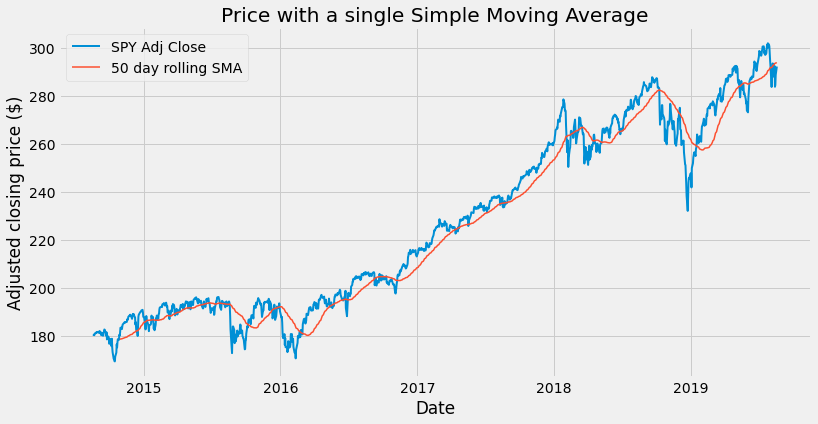

In [11]:
plt.style.use('fivethirtyeight')
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

- We can do more than that: it is possible to generate trading signals by using one single moving average. When the closing price moves above the moving average from below, we have a buy signal:
- Similarly, when the price crosses the moving average from above, a sell signal is generated:

### Plotting two averages and selecting date ranges
Let us compare two moving averages with different length, 20 and 50 days respectively:

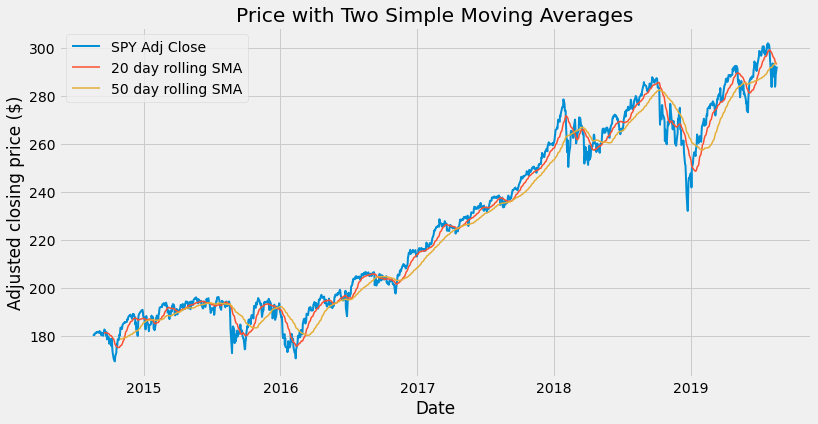

In [12]:
sma20 = close.rolling(window=20).mean()
plt.figure(figsize = (12,6))
#Plotting price with two SMAs:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma20, label='20 day rolling SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages')
plt.legend()
plt.show()

In [13]:
priceSma_df = pd.DataFrame({
      'Adj Close' : close,
      'SMA 20' : sma20,
      'SMA 50' : sma50
     })
priceSma_df

,Adj Close,SMA 20,SMA 50
Date,,,
2014-08-20,180.141846,NaN,NaN
2014-08-21,180.667160,NaN,NaN
2014-08-22,180.386368,NaN,NaN
2014-08-25,181.301010,NaN,NaN
2014-08-26,181.418716,NaN,NaN
...,...,...,...
2019-08-13,292.549988,295.381998,293.540820
2019-08-14,283.899994,294.689998,293.635375
2019-08-15,284.649994,293.980998,293.696567


Having all of our series in a single dataframe makes it easy to create a snap plot:

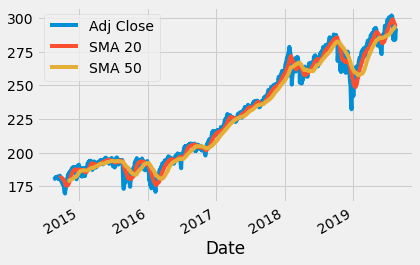

In [14]:
priceSma_df.plot()
plt.show()

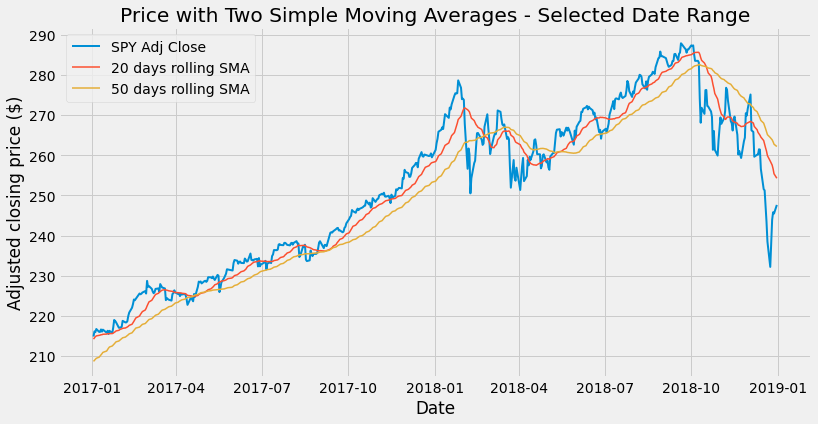

In [15]:
plt.figure(figsize = (12,6))
#Plotting price and two SMAs with a specified date range:
plt.plot(priceSma_df['2017':'2018']['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df['2017':'2018']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2017':'2018']['SMA 50'], label='50 days rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages - Selected Date Range')
plt.legend()
plt.show()

#### Slicing data by date range is one of the great features of pandas. All of the following statements work:
- priceSma_df['2017-04-01':'2017-06-15']: range defined by two specific dates
- priceSma_df['2017-01] : prices in a given month
- priceSma_df['2017] : prices in a given year

## Use of three moving averages


In [16]:
sma200 = close.rolling(window=200).mean()
priceSma_df['SMA 200'] = sma200
priceSma_df

,Adj Close,SMA 20,SMA 50,SMA 200
Date,,,,
2014-08-20,180.141846,NaN,NaN,NaN
2014-08-21,180.667160,NaN,NaN,NaN
2014-08-22,180.386368,NaN,NaN,NaN
2014-08-25,181.301010,NaN,NaN,NaN
2014-08-26,181.418716,NaN,NaN,NaN
...,...,...,...,...
2019-08-13,292.549988,295.381998,293.540820,277.238597
2019-08-14,283.899994,294.689998,293.635375,277.327894
2019-08-15,284.649994,293.980998,293.696567,277.444337


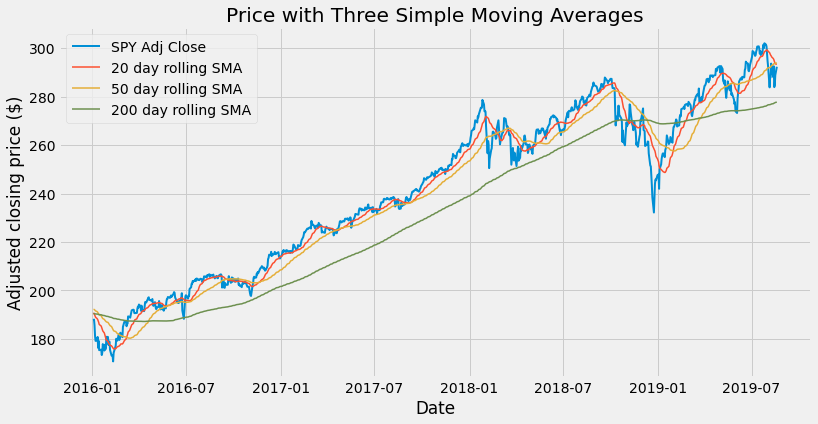

In [17]:
#Our start and end dates:
start = '2016'
end = '2019'
plt.figure(figsize = (12,6))
#Plotting price and three SMAs with start and end dates:
plt.plot(priceSma_df[start:end]['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df[start:end]['SMA 20'], label='20 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 50'], label='50 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 200'], label='200 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Three Simple Moving Averages')
plt.legend()
plt.show()

This brings us to the triple crossover method. The set of moving averages we have used, with length 20, 50 and 200 days respectively, is widely used among analysts. We can choose to consider a buy signal when the 20 SMA crosses the 50 SMA from below, but only when both averages are above the 200 SMA. All the buy crosses that occur below the 200 SMA will be disregarded.

# Weighted Moving Average 

# <a href='https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9'> Medium article </a>

In [18]:
datafile = 'cs-movavg.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index)
# We can drop the old index column:
data = data.drop(columns='Unnamed: 0')
data

,Price,10-day SMA,10-day WMA,Smoothing Constant 2/(10 + 1),10-day EMA
Date,,,,,
2010-03-24,22.273,NaN,NaN,NaN,NaN
2010-03-25,22.194,NaN,NaN,NaN,NaN
2010-03-26,22.085,NaN,NaN,NaN,NaN
2010-03-29,22.174,NaN,NaN,NaN,NaN
2010-03-30,22.184,NaN,NaN,NaN,NaN
2010-03-31,22.134,NaN,NaN,NaN,NaN
2010-04-01,22.234,NaN,NaN,NaN,NaN
2010-04-05,22.432,NaN,NaN,NaN,NaN
2010-04-06,22.244,NaN,NaN,NaN,NaN


In [21]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
wma10 = data['Price'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10.head(20)

Date
2010-03-24          NaN
2010-03-25          NaN
2010-03-26          NaN
2010-03-29          NaN
2010-03-30          NaN
2010-03-31          NaN
2010-04-01          NaN
2010-04-05          NaN
2010-04-06          NaN
2010-04-07    22.246473
2010-04-08    22.233618
2010-04-09    22.266382
2010-04-12    22.293527
2010-04-13    22.356909
2010-04-14    22.547800
2010-04-15    22.843927
2010-04-16    23.050818
2010-04-19    23.244455
2010-04-20    23.434455
2010-04-21    23.535582
Name: Price, dtype: float64

Now, we want to compare our WMA to the one obtained with the spreadsheet. To do so, we can add an ‘Our 10-day WMA’ column to the dataframe. To make the visual comparison easier, we can round the WMA series to three decimals using the.round() method from NumPy. Then, we select the price and WMA columns to be displayed:

In [23]:
data['Our 10-day WMA'] = np.round(wma10, decimals=3)
data[['Price', '10-day WMA', 'Our 10-day WMA']].head(20)

,Price,10-day WMA,Our 10-day WMA
Date,,,
2010-03-24,22.273,NaN,NaN
2010-03-25,22.194,NaN,NaN
2010-03-26,22.085,NaN,NaN
2010-03-29,22.174,NaN,NaN
2010-03-30,22.184,NaN,NaN
2010-03-31,22.134,NaN,NaN
2010-04-01,22.234,NaN,NaN
2010-04-05,22.432,NaN,NaN
2010-04-06,22.244,NaN,NaN


It would be interesting to compare in a plot our newly created WMA with the familiar SMA:

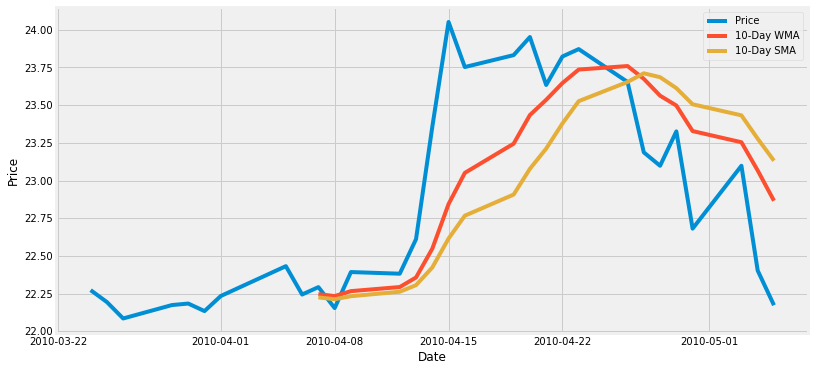

In [24]:
sma10 = data['Price'].rolling(10).mean()
plt.figure(figsize = (12,6))
plt.plot(data['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Exponential Moving Average

In [25]:
ema10 = data['Price'].ewm(span=10).mean()
ema10.head(10)


Date
2010-03-24    22.273000
2010-03-25    22.229550
2010-03-26    22.171442
2010-03-29    22.172285
2010-03-30    22.175648
2010-03-31    22.164830
2010-04-01    22.181498
2010-04-05    22.238488
2010-04-06    22.239687
2010-04-07    22.250886
Name: Price, dtype: float64

In [26]:
data['Our 10-day EMA'] = np.round(ema10, decimals=3)
data[['Price', '10-day EMA', 'Our 10-day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA
Date,,,
2010-03-24,22.273,NaN,22.273
2010-03-25,22.194,NaN,22.230
2010-03-26,22.085,NaN,22.171
2010-03-29,22.174,NaN,22.172
2010-03-30,22.184,NaN,22.176
2010-03-31,22.134,NaN,22.165
2010-04-01,22.234,NaN,22.181
2010-04-05,22.432,NaN,22.238
2010-04-06,22.244,NaN,22.240


The following lines of code create a new modified price series where the first 9 prices (when the SMA is not available) are replaced by NaN and the price on the 10th date becomes its 10-Day SMA:

In [27]:
modPrice = data['Price'].copy()
modPrice.iloc[0:10] = sma10[0:10]
modPrice.head(20)

Date
2010-03-24        NaN
2010-03-25        NaN
2010-03-26        NaN
2010-03-29        NaN
2010-03-30        NaN
2010-03-31        NaN
2010-04-01        NaN
2010-04-05        NaN
2010-04-06        NaN
2010-04-07    22.2247
2010-04-08    22.1540
2010-04-09    22.3930
2010-04-12    22.3820
2010-04-13    22.6110
2010-04-14    23.3560
2010-04-15    24.0520
2010-04-16    23.7530
2010-04-19    23.8320
2010-04-20    23.9520
2010-04-21    23.6340
Name: Price, dtype: float64

In [28]:
ema10alt = modPrice.ewm(span=10, adjust=False).mean()

In [29]:
data['Our 2nd 10-Day EMA'] = np.round(ema10alt, decimals=3)
data[['Price', '10-day EMA', 'Our 10-day EMA', 'Our 2nd 10-Day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA,Our 2nd 10-Day EMA
Date,,,,
2010-03-24,22.273,NaN,22.273,NaN
2010-03-25,22.194,NaN,22.230,NaN
2010-03-26,22.085,NaN,22.171,NaN
2010-03-29,22.174,NaN,22.172,NaN
2010-03-30,22.184,NaN,22.176,NaN
2010-03-31,22.134,NaN,22.165,NaN
2010-04-01,22.234,NaN,22.181,NaN
2010-04-05,22.432,NaN,22.238,NaN
2010-04-06,22.244,NaN,22.240,NaN
